# Assignment 3

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [1]:
import os
import pandas as pd

In [2]:
def read_data(path, Type):
    """Extract data from each file, then extract the fresh row and delete irrelevant
    columns. Arguments are a string for the path and a string for the Type: fruit or vegetable"""
    files = os.listdir(path)
    df = pd.DataFrame()
    for f in files:
        data = pd.read_excel(path + '/' + f, header = None, skiprows = [0,1,2])
        data = data.iloc[:,:7]
        data = data.rename(columns=lambda i: ['Form', 'Price Per lb', 'Unit', 'Yield', 'lb Per Cup', 'Unit',
                                              'Price per Cup'][i])
        data = data.drop(data.columns[[2,5]], axis=1)
        x1 = pd.ExcelFile(path + '/' + f)
        a = x1.sheet_names
        data['Food'] = str(a[0])
        data['Type'] = Type
        data = data[data["Form"].str.startswith("Fresh") == True]
        
        df = df.append(data)
        
    return df    

In [3]:
fruit_data = read_data('assignment3_data/fruit', 'Fruit')

__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [4]:
veg_data = read_data('assignment3_data/vegetables', 'Vegetable')

__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [5]:
veg_data = veg_data.dropna()
final_data = pd.concat([fruit_data, veg_data])
cols = final_data.columns.tolist()
cols = cols[-1:] + [str(cols[5])] + cols[:-2]
final_data = final_data[cols]

__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

We add a column to each data frames that computes the ratio of "Price Per lb" to "Yield". 

In [6]:
fruit_data['Adj Price'] = fruit_data['Price Per lb']/fruit_data['Yield']
veg_data['Adj Price'] = veg_data['Price Per lb']/veg_data['Yield']
final_data['Adj Price'] = final_data['Price Per lb']/final_data['Yield']

We compute the mean of the three price columns among fruits and vegetables below. 

In [7]:
a = fruit_data["Price Per lb"].mean()
b = fruit_data["Adj Price"].mean()
c = fruit_data["Price per Cup"].mean()
d = veg_data["Price Per lb"].mean()
e = veg_data["Adj Price"].mean()
g = veg_data["Price per Cup"].mean()

In [8]:
import numpy as np
index = ['fruit', 'vegetable']
columns = ['Price Per lb', 'Adj Price', 'Price per Cup']
data = np.array([[a, b, c],[d, e, g]])

mean = pd.DataFrame(data, index=index, columns=columns)
mean

,Price Per lb,Adj Price,Price per Cup
fruit,2.076877,2.512136,0.862056
vegetable,1.838701,2.514681,0.856272


Now we plot the price data in one easy to read plot. 

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

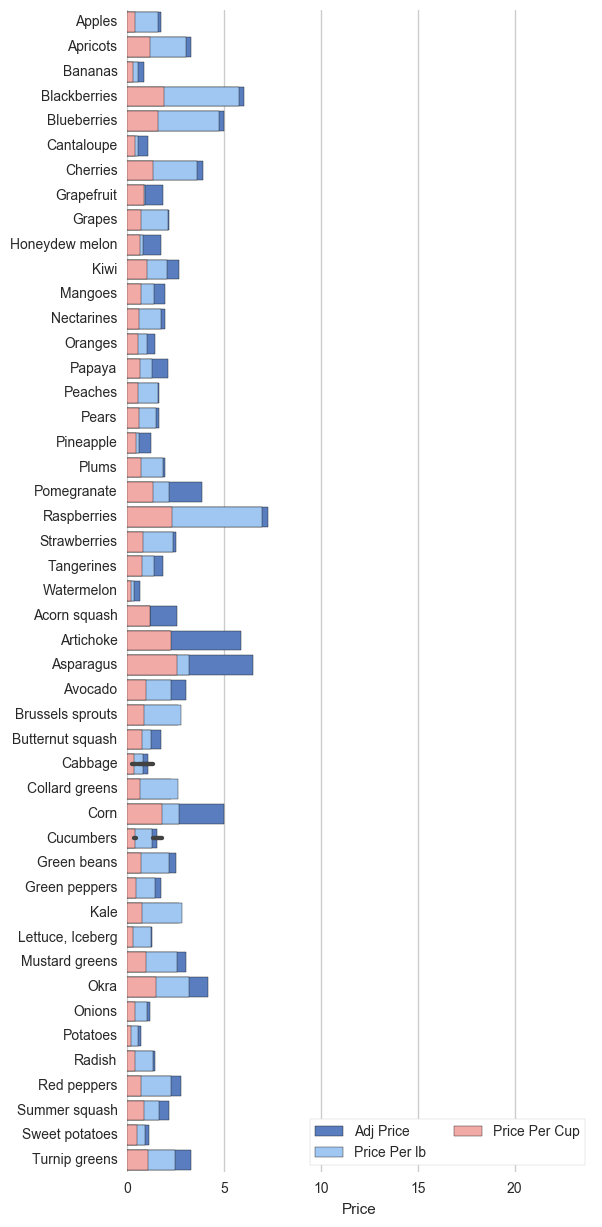

In [10]:
sns.set(style = 'whitegrid')

f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes("muted")
sns.barplot(x="Adj Price", y="Food", data=final_data, label="Adj Price", color="b")

sns.set_color_codes("pastel")
sns.barplot(x="Price Per lb", y="Food", data=final_data, label="Price Per lb", color="b")

sns.set_color_codes("pastel")
sns.barplot(x="Price per Cup", y="Food", data=final_data, label="Price Per Cup", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="", xlabel="Price")
sns.despine(left=True, bottom=True)
plt.show()

From the graph above, we can compare the Price Per lb, the Price Per Cup, and the Adjusted Price (Price Per lb/Yield). The Adjusted Price gives an accurate price per lb for the food according to how much of the food you can actually use. Thus, it is useful to compare the adjusted prices of various foods. It is also useful to compare the price per cup to gain a sense of volume. 

To easily compare these three things among the different foods, I chose a horizontal bar graph, with the different bars overlapping. 

__Most/least expensive:__
Fruit: Watermelon, bananas, cantaloup, and pineapple are the least expensive on all three measures. Raspberries, blackberries, and blueberries are the most expensive fruit according to price per lb and adjusted price. However, when comparing price per cup, the prices are lower and pomegranate is similar in price. 

Vegetable: Artichoke, asparagus, and corn have the highest adjusted price, but there is a big descrepancy between the adjusted price and price per lb of artichoke and asparagus. However, they still have a high price per cup. Cabbage, potatoes, and onions have the lowest prices among all three measures. 

__Best value:__
To assess value, I chose to look at the adjusted price. The adjusted price is what you pay per lb of food that you actually use. Many of the root vegetables have the best value among vegetables: potatoes, sweet potatoes, onions, and radish. Cabbage also has a good value. Among fruit, watermelon, cantaloup, bananas, and pineapple have the best values. 

__Price distributions:__
The prices are similar among fruits and vegetables. It appears that fruits have some of the most expensive items, but comparing means, we can see that the mean prices of fruits and vegetables are almost identical with respect to the adjusted price and price per cup. The mean for price per lb is lower for vegetables than for fruits. If we were to compute variance, I would expect the variance of the fruit data to be higher than the vegetable data. 

__Surprises:__
I expected fruits to be more expensive than vegetables, but they ended up having similar distributions. I was also surprised to see the adjusted price for asparagus was so much higher than the price per lb. I don't discard very much of the stalk, so I was not expecting this much of a difference in price. 

__Combination of price, yield, and nutrition:__
Tangerines, oranges, cantaloup, and bananas all have a low adjusted price and would provide good nutrition. Among vegetables, sweet potatoes, summer squash, and green peppers all have a low adjusted price and would provide good nutrition. To test my hypothesis, I would need to factor in the nutrition data. I would compare adjusted price and nutritional value. Foods with higher nutritional value will have more nutrients per lb. We could examine a scatter plot to identify foods that have  higher nutritional value, but lower adjusted price. 
